In [250]:
from bs4 import BeautifulSoup as bs
import requests
import sys
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

In [251]:
df = pd.read_csv("Sattelites_Dataset.csv",index_col=[0]) 

#### Understanding our data by looking at our data information.

In [252]:
df

,Name,Type,Norad ID,Int'l Code,Perigee,Apogee,Period,Launch Date,Source
0,STARLINK-3314,Starlink,50851,2022-001BA,315.2,329.2,90.8,"January 6, 2022",United States (US)
1,STARLINK-3312,Starlink,50850,2022-001AZ,315.9,328.5,90.8,"January 6, 2022",United States (US)
2,STARLINK-3311,Starlink,50849,2022-001AY,315.4,329.3,90.8,"January 6, 2022",United States (US)
3,STARLINK-3315,Starlink,50848,2022-001AX,315.2,329.3,90.8,"January 6, 2022",United States (US)
4,STARLINK-3319,Starlink,50847,2022-001AW,315.5,329.5,90.8,"January 6, 2022",United States (US)
...,...,...,...,...,...,...,...,...,...
7084,ANIK A1 (TELESAT 1),Geostationary,6278,1972-090A,36139.7,36268.0,1457.1,"November 10, 1972",Canada (CA)
7085,ISIS 2,Space & Earth Science,5104,1971-024A,1363.3,1432.4,113.6,"April 1, 1971",Canada (CA)
7086,ISIS 1,Brightest,3669,1969-009A,585.0,3454.7,127.5,"January 30, 1969",Canada (CA)
7087,ALOUETTE 2,Space & Earth Science,1804,1965-098A,508.1,2642.9,117.5,"November 29, 1965",Canada (CA)


In [218]:
df.columns

Index(['Name', 'Type', 'Norad ID', 'Int'l Code', 'Perigee', 'Apogee', 'Period',
       'Launch Date', 'Source'],
      dtype='object')

In [219]:
df.dtypes

Name            object
Type            object
Norad ID         int64
Int'l Code      object
Perigee        float64
Apogee         float64
Period         float64
Launch Date     object
Source          object
dtype: object

#### 1. Locating Missing Data (if there any) and handling them

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7089 entries, 0 to 7088
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         7089 non-null   object 
 1   Type         6361 non-null   object 
 2   Norad ID     7089 non-null   int64  
 3   Int'l Code   7089 non-null   object 
 4   Perigee      7089 non-null   float64
 5   Apogee       7089 non-null   float64
 6   Period       7089 non-null   float64
 7   Launch Date  7089 non-null   object 
 8   Source       7089 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 553.8+ KB


In [221]:
df.describe(include='all')

,Name,Type,Norad ID,Int'l Code,Perigee,Apogee,Period,Launch Date,Source
count,7089,6361,7089.000000,7089,7089.000000,7089.000000,7089.000000,7089,7089
unique,7047,53,NaN,7085,NaN,NaN,NaN,2477,14
top,WESTFORD NEEDLES,Starlink,NaN,2015-032C,NaN,NaN,NaN,"January 24, 2021",United States (US)
freq,35,1820,NaN,2,NaN,NaN,NaN,121,3803
mean,NaN,NaN,34505.509804,NaN,6917.974016,8289.001918,360.014135,NaN,NaN
std,NaN,NaN,14932.869109,NaN,12946.229152,16648.322907,607.913053,NaN,NaN
min,NaN,NaN,5.000000,NaN,145.200000,161.300000,87.400000,NaN,NaN
25%,NaN,NaN,22238.000000,NaN,552.800000,555.400000,95.600000,NaN,NaN
50%,NaN,NaN,41998.000000,NaN,644.000000,773.200000,99.300000,NaN,NaN
75%,NaN,NaN,46931.000000,NaN,1467.400000,1552.100000,115.900000,NaN,NaN


In [174]:
df.isnull().sum()

Name             0
Type           728
Norad ID         0
Int'l Code       0
Perigee          0
Apogee           0
Period           0
Launch Date      0
Source           0
dtype: int64

In [253]:
# making another dataset without the 'Type' null rows (for the machine learning)
df_no_null = df.copy()
df_no_null = df_no_null.dropna(axis = 0)
df_no_null

,Name,Type,Norad ID,Int'l Code,Perigee,Apogee,Period,Launch Date,Source
0,STARLINK-3314,Starlink,50851,2022-001BA,315.2,329.2,90.8,"January 6, 2022",United States (US)
1,STARLINK-3312,Starlink,50850,2022-001AZ,315.9,328.5,90.8,"January 6, 2022",United States (US)
2,STARLINK-3311,Starlink,50849,2022-001AY,315.4,329.3,90.8,"January 6, 2022",United States (US)
3,STARLINK-3315,Starlink,50848,2022-001AX,315.2,329.3,90.8,"January 6, 2022",United States (US)
4,STARLINK-3319,Starlink,50847,2022-001AW,315.5,329.5,90.8,"January 6, 2022",United States (US)
...,...,...,...,...,...,...,...,...,...
7084,ANIK A1 (TELESAT 1),Geostationary,6278,1972-090A,36139.7,36268.0,1457.1,"November 10, 1972",Canada (CA)
7085,ISIS 2,Space & Earth Science,5104,1971-024A,1363.3,1432.4,113.6,"April 1, 1971",Canada (CA)
7086,ISIS 1,Brightest,3669,1969-009A,585.0,3454.7,127.5,"January 30, 1969",Canada (CA)
7087,ALOUETTE 2,Space & Earth Science,1804,1965-098A,508.1,2642.9,117.5,"November 29, 1965",Canada (CA)


In [254]:
# Fill in the original dataset all the missing data With the string 'XXX' as we selected as our marker
df.Type.fillna('XXX',inplace = True)
df

,Name,Type,Norad ID,Int'l Code,Perigee,Apogee,Period,Launch Date,Source
0,STARLINK-3314,Starlink,50851,2022-001BA,315.2,329.2,90.8,"January 6, 2022",United States (US)
1,STARLINK-3312,Starlink,50850,2022-001AZ,315.9,328.5,90.8,"January 6, 2022",United States (US)
2,STARLINK-3311,Starlink,50849,2022-001AY,315.4,329.3,90.8,"January 6, 2022",United States (US)
3,STARLINK-3315,Starlink,50848,2022-001AX,315.2,329.3,90.8,"January 6, 2022",United States (US)
4,STARLINK-3319,Starlink,50847,2022-001AW,315.5,329.5,90.8,"January 6, 2022",United States (US)
...,...,...,...,...,...,...,...,...,...
7084,ANIK A1 (TELESAT 1),Geostationary,6278,1972-090A,36139.7,36268.0,1457.1,"November 10, 1972",Canada (CA)
7085,ISIS 2,Space & Earth Science,5104,1971-024A,1363.3,1432.4,113.6,"April 1, 1971",Canada (CA)
7086,ISIS 1,Brightest,3669,1969-009A,585.0,3454.7,127.5,"January 30, 1969",Canada (CA)
7087,ALOUETTE 2,Space & Earth Science,1804,1965-098A,508.1,2642.9,117.5,"November 29, 1965",Canada (CA)


#### 2. Locating Duplicate data (if there any)  and handling them 

In [255]:
df.duplicated().sum() # as we can see there is not any FULL duplicate data

0

In [225]:
df[df.duplicated(['Name'])].head() # those duplicates are ok some satellites have the same name (but different norad id)

,Name,Type,Norad ID,Int'l Code,Perigee,Apogee,Period,Launch Date,Source
3213,SURFSAT,Experimental,23711,1995-059B,940.2,1499.3,109.7,"November 4, 1995",United States (US)
3312,WESTFORD NEEDLES,Westford Needles,20504,1963-014FD,460.7,6232.1,158.9,"May 9, 1963",United States (US)
3328,WESTFORD NEEDLES,Westford Needles,19946,1963-014EU,2750.1,4484.1,165.6,"May 9, 1963",United States (US)
3329,WESTFORD NEEDLES,Westford Needles,19891,1963-014ET,3171.1,4104.3,166.1,"May 9, 1963",United States (US)
3339,WESTFORD NEEDLES,Westford Needles,19299,1963-014EL,2897.5,4365.0,165.9,"May 9, 1963",United States (US)


In [226]:
df[df.duplicated(['Norad ID'])].head()  # as we can see there are not any duplicates 

,Name,Type,Norad ID,Int'l Code,Perigee,Apogee,Period,Launch Date,Source


#### 3. Locating Outliers data (if there any)  and handling them 

In [227]:
df.describe(include='all')

,Name,Type,Norad ID,Int'l Code,Perigee,Apogee,Period,Launch Date,Source
count,7089,7089,7089.000000,7089,7089.000000,7089.000000,7089.000000,7089,7089
unique,7047,54,NaN,7085,NaN,NaN,NaN,2477,14
top,WESTFORD NEEDLES,Starlink,NaN,2015-032C,NaN,NaN,NaN,"January 24, 2021",United States (US)
freq,35,1820,NaN,2,NaN,NaN,NaN,121,3803
mean,NaN,NaN,34505.509804,NaN,6917.974016,8289.001918,360.014135,NaN,NaN
std,NaN,NaN,14932.869109,NaN,12946.229152,16648.322907,607.913053,NaN,NaN
min,NaN,NaN,5.000000,NaN,145.200000,161.300000,87.400000,NaN,NaN
25%,NaN,NaN,22238.000000,NaN,552.800000,555.400000,95.600000,NaN,NaN
50%,NaN,NaN,41998.000000,NaN,644.000000,773.200000,99.300000,NaN,NaN
75%,NaN,NaN,46931.000000,NaN,1467.400000,1552.100000,115.900000,NaN,NaN


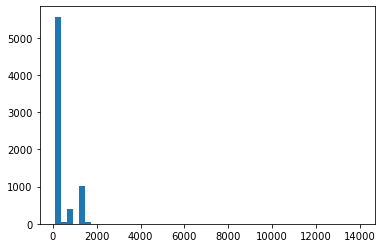

In [181]:
plt.hist(df.Period, bins=50)
plt.xlabel=("Period") 
plt.ylabel=("Type")

In [256]:
df.Type.describe()

count         7089
unique          54
top       Starlink
freq          1820
Name: Type, dtype: object

There is not any outliers data .
We finished the data cleaning .

#### Now we will add another column that called 'Month' with numeric  'Launch Date' variable in both datasets

In [257]:
def month_numeric(dataset):
    lst = []
    for date in dataset["Launch Date"]:
        
        if('January' in date):
            lst.append(1)
            
        if('February' in date):
            lst.append(2)   
            
        if('March' in date):
            lst.append(3)
        
        if('April' in date):
            lst.append(4)
            
        if('May' in date):
            lst.append(5)
            
        if('June' in date):
            lst.append(6)
            
        if('July' in date):
            lst.append(7)
            
        if('August' in date):
            lst.append(8)
            
        if('September' in date):
            lst.append(9)
            
        if('October' in date):
            lst.append(10)
            
        if('November' in date):
            lst.append(11)
            
        if('December' in date):
            lst.append(12)
            
    return lst      

In [258]:
lst_month = month_numeric(df)
df['Month'] = lst_month
df

,Name,Type,Norad ID,Int'l Code,Perigee,Apogee,Period,Launch Date,Source,Month
0,STARLINK-3314,Starlink,50851,2022-001BA,315.2,329.2,90.8,"January 6, 2022",United States (US),1
1,STARLINK-3312,Starlink,50850,2022-001AZ,315.9,328.5,90.8,"January 6, 2022",United States (US),1
2,STARLINK-3311,Starlink,50849,2022-001AY,315.4,329.3,90.8,"January 6, 2022",United States (US),1
3,STARLINK-3315,Starlink,50848,2022-001AX,315.2,329.3,90.8,"January 6, 2022",United States (US),1
4,STARLINK-3319,Starlink,50847,2022-001AW,315.5,329.5,90.8,"January 6, 2022",United States (US),1
...,...,...,...,...,...,...,...,...,...,...
7084,ANIK A1 (TELESAT 1),Geostationary,6278,1972-090A,36139.7,36268.0,1457.1,"November 10, 1972",Canada (CA),11
7085,ISIS 2,Space & Earth Science,5104,1971-024A,1363.3,1432.4,113.6,"April 1, 1971",Canada (CA),4
7086,ISIS 1,Brightest,3669,1969-009A,585.0,3454.7,127.5,"January 30, 1969",Canada (CA),1
7087,ALOUETTE 2,Space & Earth Science,1804,1965-098A,508.1,2642.9,117.5,"November 29, 1965",Canada (CA),11


In [259]:
lst_month = month_numeric(df_no_null)
df_no_null['Month'] = lst_month
df_no_null

,Name,Type,Norad ID,Int'l Code,Perigee,Apogee,Period,Launch Date,Source,Month
0,STARLINK-3314,Starlink,50851,2022-001BA,315.2,329.2,90.8,"January 6, 2022",United States (US),1
1,STARLINK-3312,Starlink,50850,2022-001AZ,315.9,328.5,90.8,"January 6, 2022",United States (US),1
2,STARLINK-3311,Starlink,50849,2022-001AY,315.4,329.3,90.8,"January 6, 2022",United States (US),1
3,STARLINK-3315,Starlink,50848,2022-001AX,315.2,329.3,90.8,"January 6, 2022",United States (US),1
4,STARLINK-3319,Starlink,50847,2022-001AW,315.5,329.5,90.8,"January 6, 2022",United States (US),1
...,...,...,...,...,...,...,...,...,...,...
7084,ANIK A1 (TELESAT 1),Geostationary,6278,1972-090A,36139.7,36268.0,1457.1,"November 10, 1972",Canada (CA),11
7085,ISIS 2,Space & Earth Science,5104,1971-024A,1363.3,1432.4,113.6,"April 1, 1971",Canada (CA),4
7086,ISIS 1,Brightest,3669,1969-009A,585.0,3454.7,127.5,"January 30, 1969",Canada (CA),1
7087,ALOUETTE 2,Space & Earth Science,1804,1965-098A,508.1,2642.9,117.5,"November 29, 1965",Canada (CA),11


#### Function that reducing the satellite's Types to a few main ones and giving numeric values
0 = Communication satellites  |   1 =  Gps satellites  | 2 = Earth observations

Note: We deleted all the rows that contain Types that are null or irrelevant (like Experimental satellites which don't have actual type)

In [375]:
def filter_rows_by_values(df_no_null, col, values):
    df_no_null.replace(['Starlink','Military','Westford Needles','OneWeb','Experimental','Iridium'
                    ,'Tracking and Data Relay Satellite System','Gonets','Strela','Raduga','Parus','Gorizont'
                    ,'Molniya','Globalstar','Intelsat','QZSS','Orbcomm','Weather'],0, inplace=True)


    df_no_null.replace(['Global Positioning System (GPS) Constellation','Global Positioning System (GPS) Operational',
                   'Radar Calibration','Navy Navigation Satellite System','Glonass Constellation',
                    'Glonass Operational','Russian LEO Navigation','Tsikada','Tsiklon','Galileo'
                   ,'Satellite-Based Augmentation System','IRNSS','Beidou Navigation System','Geostationary','GOES'
                       ,'TV','XM and Sirius'],1, inplace=True)

    df_no_null.replace(['Flock','Celestis','Space & Earth Science','Brightest','Earth resources','CubeSats','Geodetic'
                   ,'Disaster monitoring','Yaogan','Lemur','Education','Tselina','Amateur radio','Search & rescue'
                       ,'NOAA'],2, inplace=True)

    return df_no_null[~df_no_null[col].isin(values)]

In [377]:
df_no_null = filter_rows_by_values(df_no_null,'Type',['ISS','Chinese Space Station','Engineering'])

df_no_null

,Name,Type,Norad ID,Int'l Code,Perigee,Apogee,Period,Launch Date,Source,Month
0,STARLINK-3314,0,50851,2022-001BA,315.2,329.2,90.8,"January 6, 2022",United States (US),1
1,STARLINK-3312,0,50850,2022-001AZ,315.9,328.5,90.8,"January 6, 2022",United States (US),1
2,STARLINK-3311,0,50849,2022-001AY,315.4,329.3,90.8,"January 6, 2022",United States (US),1
3,STARLINK-3315,0,50848,2022-001AX,315.2,329.3,90.8,"January 6, 2022",United States (US),1
4,STARLINK-3319,0,50847,2022-001AW,315.5,329.5,90.8,"January 6, 2022",United States (US),1
...,...,...,...,...,...,...,...,...,...,...
7084,ANIK A1 (TELESAT 1),1,6278,1972-090A,36139.7,36268.0,1457.1,"November 10, 1972",Canada (CA),11
7085,ISIS 2,2,5104,1971-024A,1363.3,1432.4,113.6,"April 1, 1971",Canada (CA),4
7086,ISIS 1,2,3669,1969-009A,585.0,3454.7,127.5,"January 30, 1969",Canada (CA),1
7087,ALOUETTE 2,2,1804,1965-098A,508.1,2642.9,117.5,"November 29, 1965",Canada (CA),11


In [378]:
df_no_null.Type.describe()

count     6311
unique       3
top          0
freq      3942
Name: Type, dtype: int64

#### Adding Orbit column which means the satellite's Orbit altitude
1 = Low Orbit - Period under 130  |   2 = medium Oribit - Period 130 to 1450   | 3 = high Orbit - Period over 1450

In [384]:
# Adding Orbit Column to original dataset
df_under_130 = df[df['Period']<130].reset_index(drop=True)
df_130_to_1450 = df[(df['Period']>=130) & (df['Period']<=1450)].reset_index(drop=True)
df_over_1450 = df[df['Period']>1450].reset_index(drop=True)

df_under_130['Orbit'] = 1
df_130_to_1450['Orbit'] = 2
df_over_1450['Orbit'] = 3

df = pd.concat([df_under_130, df_130_to_1450,df_over_1450], ignore_index=True)


In [385]:
df

,Name,Type,Norad ID,Int'l Code,Perigee,Apogee,Period,Launch Date,Source,Month,Orbit
0,STARLINK-3314,Starlink,50851,2022-001BA,315.2,329.2,90.8,"January 6, 2022",United States (US),1,1
1,STARLINK-3312,Starlink,50850,2022-001AZ,315.9,328.5,90.8,"January 6, 2022",United States (US),1,1
2,STARLINK-3311,Starlink,50849,2022-001AY,315.4,329.3,90.8,"January 6, 2022",United States (US),1,1
3,STARLINK-3315,Starlink,50848,2022-001AX,315.2,329.3,90.8,"January 6, 2022",United States (US),1,1
4,STARLINK-3319,Starlink,50847,2022-001AW,315.5,329.5,90.8,"January 6, 2022",United States (US),1,1
...,...,...,...,...,...,...,...,...,...,...,...
7084,NIMIQ 1,Geostationary,25740,1999-027A,36221.6,36328.1,1460.7,"May 20, 1999",Canada (CA),5,3
7085,MSAT M1,Geostationary,23846,1996-022A,36190.0,36322.7,1459.8,"April 20, 1996",Canada (CA),4,3
7086,ANIK E1,Geostationary,21726,1991-067A,36054.9,36150.6,1451.9,"September 26, 1991",Canada (CA),9,3
7087,ANIK E2,Geostationary,21222,1991-026A,36078.6,36157.1,1452.7,"April 4, 1991",Canada (CA),4,3


In [387]:
# Adding Orbit Column to dataset without the null rows
df_under_130 = df_no_null[df_no_null['Period']<130].reset_index(drop=True)
df_130_to_1450 = df_no_null[(df_no_null['Period']>=130) & (df_no_null['Period']<=1450)].reset_index(drop=True)
df_over_1450 = df_no_null[df_no_null['Period']>1450].reset_index(drop=True)

df_under_130['Orbit'] = 1
df_130_to_1450['Orbit'] = 2
df_over_1450['Orbit'] = 3

df_no_null = pd.concat([df_under_130, df_130_to_1450,df_over_1450], ignore_index=True)

In [388]:
df_no_null

,Name,Type,Norad ID,Int'l Code,Perigee,Apogee,Period,Launch Date,Source,Month,Orbit
0,STARLINK-3314,0,50851,2022-001BA,315.2,329.2,90.8,"January 6, 2022",United States (US),1,1
1,STARLINK-3312,0,50850,2022-001AZ,315.9,328.5,90.8,"January 6, 2022",United States (US),1,1
2,STARLINK-3311,0,50849,2022-001AY,315.4,329.3,90.8,"January 6, 2022",United States (US),1,1
3,STARLINK-3315,0,50848,2022-001AX,315.2,329.3,90.8,"January 6, 2022",United States (US),1,1
4,STARLINK-3319,0,50847,2022-001AW,315.5,329.5,90.8,"January 6, 2022",United States (US),1,1
...,...,...,...,...,...,...,...,...,...,...,...
6306,NIMIQ 1,1,25740,1999-027A,36221.6,36328.1,1460.7,"May 20, 1999",Canada (CA),5,3
6307,MSAT M1,1,23846,1996-022A,36190.0,36322.7,1459.8,"April 20, 1996",Canada (CA),4,3
6308,ANIK E1,1,21726,1991-067A,36054.9,36150.6,1451.9,"September 26, 1991",Canada (CA),9,3
6309,ANIK E2,1,21222,1991-026A,36078.6,36157.1,1452.7,"April 4, 1991",Canada (CA),4,3


In [389]:
df.to_csv("Final Dataset.csv",index=False)
df_no_null.to_csv("Final Clean Dataset.csv",index=False)